# Avocado Data Analysis

## Data Description
In the Avocado dataset we have to predict the Average price using Regression model from the provided Data.

Import required libraries

In [220]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [221]:
df=pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


Data has been imported and we can see the first 5 rows of the data using df.head() function

In [222]:
df.shape

(16468, 14)

This is the shape of data

In [223]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

These are the datatypes of each columns which includes float and object values 

In [224]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

These are the columns of data

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [226]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

The data has null values

In [227]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,05-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In Total volume,Xlargebags mean is higher than median.

Standard deviation is very much higher in Unnamed column.

The max coulmn value is lesser than the 75th percentile in Total Volume,4770,Large Bags.

In XLarge bags there is a huge difference between 75th percentile and max column which means there are oultiers.

In [228]:
df.type.unique()

array(['conventional', nan], dtype=object)

In [229]:
df.year.unique()

array([2015., 2016.,   nan])

In [230]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico', nan], dtype=object)

In [231]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['type','region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
    
    df=df.replace(np.nan,df.mean())

In [232]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,26.995386,NaN,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16464,26.995386,NaN,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16465,26.995386,NaN,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16466,26.995386,NaN,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16467,26.995386,NaN,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51


In [233]:
df.type.unique()

array([0, 1])

In [234]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [235]:
df=df.drop("Date",axis=1)

In [236]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


In [237]:
df.iloc[:,0:13]

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.000000,1.33000,6.423662e+04,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,0,2015.000000,0
1,1.000000,1.35000,5.487698e+04,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,0,2015.000000,0
2,2.000000,0.93000,1.182202e+05,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,0,2015.000000,0
3,3.000000,1.08000,7.899215e+04,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,0,2015.000000,0
4,4.000000,1.28000,5.103960e+04,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,0,2015.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,26.995386,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16464,26.995386,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16465,26.995386,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51
16466,26.995386,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1,2015.162821,51


In [238]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 0:13])
df.iloc[0:13] = imputer.transform(df.iloc[0:13])

In [239]:
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have replaced all null values with mean using imputer

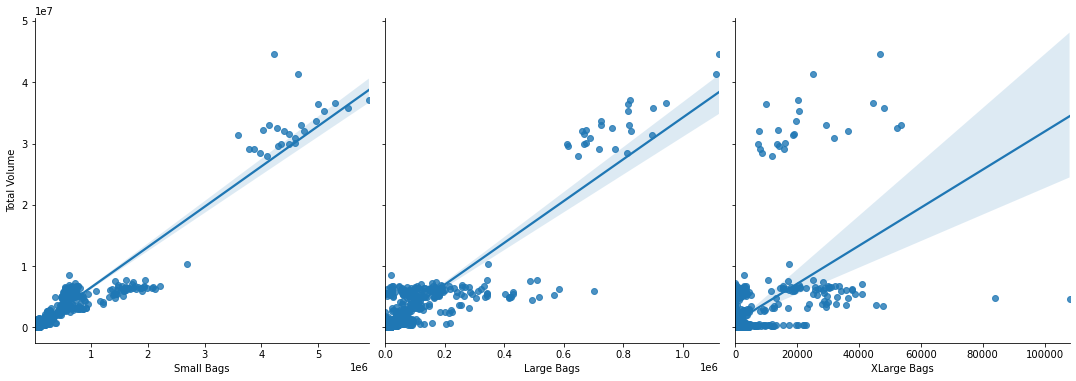

In [240]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

In this plot we can see the graph of total volume vs small bags,large bags and Xlarge bags

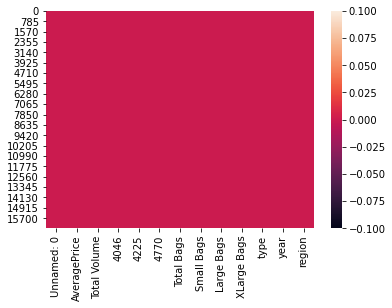

In [241]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [242]:
dfcor=df.corr()
dfcor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000e+00,-7.553138e-02,9.193428e-02,9.201312e-02,9.356639e-02,7.564678e-02,8.100683e-02,8.348484e-02,6.536353e-02,-5.099340e-02,-6.188783e-17,-1.285383e-02,0.005987
AveragePrice,-7.553138e-02,1.000000e+00,-1.404703e-01,-1.900958e-01,-9.208409e-02,-1.005665e-01,-1.115968e-01,-9.768201e-02,-1.774802e-01,-4.828395e-02,-1.176882e-15,1.786833e-01,-0.113287
Total Volume,9.193428e-02,-1.404703e-01,1.000000e+00,9.855681e-01,9.871539e-01,9.343468e-01,9.676892e-01,9.606418e-01,9.102257e-01,5.217167e-01,2.950134e-16,-4.188663e-03,0.116829
4046,9.201312e-02,-1.900958e-01,9.855681e-01,1.000000e+00,9.519521e-01,8.985705e-01,9.303953e-01,9.222784e-01,8.842287e-01,4.740631e-01,-9.541918e-17,-4.043896e-02,0.133076
4225,9.356639e-02,-9.208409e-02,9.871539e-01,9.519521e-01,1.000000e+00,9.277567e-01,9.517787e-01,9.439881e-01,9.004960e-01,5.047183e-01,-3.045811e-16,-7.254036e-03,0.106535
4770,7.564678e-02,-1.005665e-01,9.343468e-01,8.985705e-01,9.277567e-01,1.000000e+00,9.264054e-01,9.236070e-01,8.405225e-01,6.460527e-01,1.611544e-16,2.922175e-02,0.068193
Total Bags,8.100683e-02,-1.115968e-01,9.676892e-01,9.303953e-01,9.517787e-01,9.264054e-01,1.000000e+00,9.973413e-01,9.113358e-01,6.018562e-01,5.415337e-16,9.010785e-02,0.093827
Small Bags,8.348484e-02,-9.768201e-02,9.606418e-01,9.222784e-01,9.439881e-01,9.236070e-01,9.973413e-01,1.000000e+00,8.791314e-01,6.113004e-01,-3.295303e-16,1.063820e-01,0.083284
Large Bags,6.536353e-02,-1.774802e-01,9.102257e-01,8.842287e-01,9.004960e-01,8.405225e-01,9.113358e-01,8.791314e-01,1.000000e+00,4.477790e-01,4.423608e-16,-1.867835e-02,0.146889
XLarge Bags,-5.099340e-02,-4.828395e-02,5.217167e-01,4.740631e-01,5.047183e-01,6.460527e-01,6.018562e-01,6.113004e-01,4.477790e-01,1.000000e+00,1.272376e-15,2.183418e-01,-0.022787


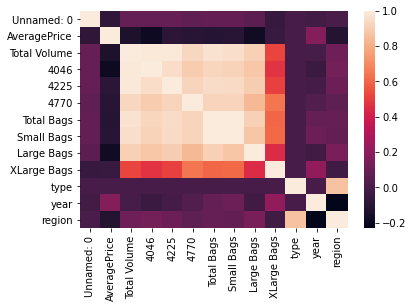

In [243]:
sns.heatmap(dfcor)

There are negative correaltion between year and region

Average price is highly correlated with type and year.

Small Bags and Large Bags are positively correlated with each other.

The black colour represent the negative correlation and the lighter shades represent the positive correlation as shown in the  number ranges present in side of the graph

In [244]:
df.shape

(16468, 13)

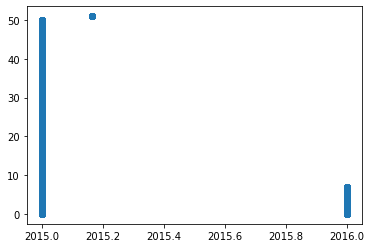

In [245]:
plt.scatter(df['year'],df['region'])

The scatter plot stating the relation of year and region

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
type               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
year               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
region             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

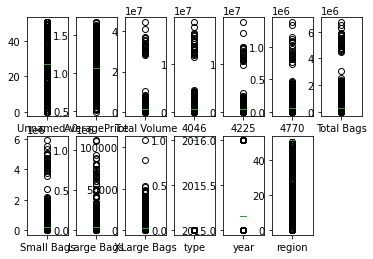

In [246]:
df.plot(kind='box',subplots=True, layout=(2,7))

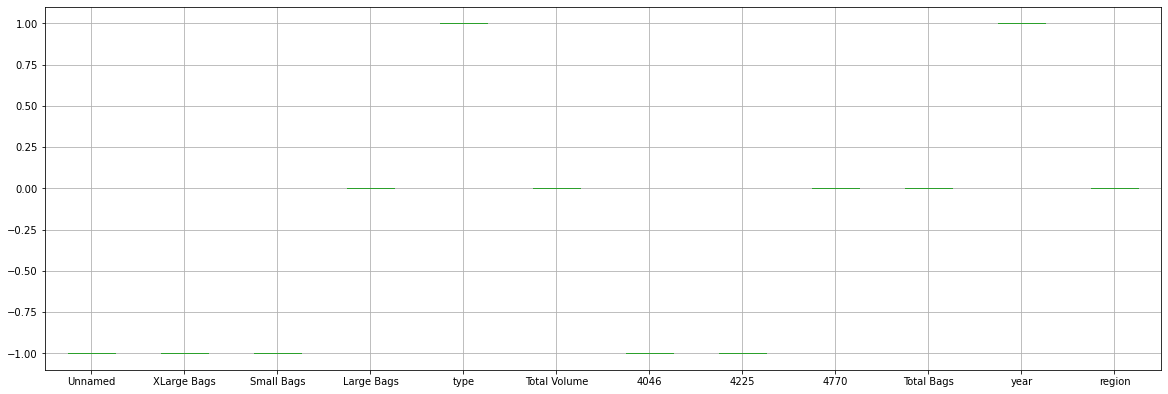

In [247]:
x.iloc[:,0:14].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers present in 4770,4225,4046,TotalVolume,type,LargeBags,SmallBags, XlargeBags

## Removing Outliers

In [248]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[5.99216858e+00, 4.44954957e+00, 1.14317960e+00, ...,
        3.13936875e+00, 1.45302891e+00, 4.86836706e+00],
       [5.77019847e+00, 4.79852031e+00, 1.15013814e+00, ...,
        3.13936875e+00, 1.45302891e+00, 4.86836706e+00],
       [5.54822837e+00, 2.52986539e+00, 1.10304481e+00, ...,
        3.13936875e+00, 1.45302891e+00, 4.86836706e+00],
       ...,
       [2.36578868e-15, 3.87435359e-15, 1.73100867e-16, ...,
        3.18535375e-01, 4.05819639e-12, 2.76986031e-01],
       [2.36578868e-15, 3.87435359e-15, 1.73100867e-16, ...,
        3.18535375e-01, 4.05819639e-12, 2.76986031e-01],
       [2.36578868e-15, 3.87435359e-15, 1.73100867e-16, ...,
        3.18535375e-01, 4.05819639e-12, 2.76986031e-01]])

In [249]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1, 10, ..., 10, 11, 12], dtype=int64))


In [250]:
z[0][1]

4.449549565294475

In [251]:
z[1516][11]

7.471039328865382

In [252]:
df_av=df[(z<3).all(axis=1)]

In [253]:
df.shape

(16468, 13)

In [254]:
df_av.shape

(14951, 13)

All the outliers are removed

In [255]:
df_av.skew()

Unnamed: 0      0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64

There is no sknewness in data 

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_av)
df_avocado_scaler = scaler.transform(df_av)
df_avocado = pd.DataFrame(df_avocado_scaler)
df_avocado.columns = ['Unnamed','AveragePrice', 'XLarge Bags', 'Small Bags', 'Large Bags','type','Total Volume', '4046','4225','4770','Total Bags','year','region']
df_avocado.head()

,Unnamed,AveragePrice,XLarge Bags,Small Bags,Large Bags,type,Total Volume,4046,4225,4770,Total Bags,year,region
0,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
1,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
2,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
3,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
4,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0


In [279]:
x=df_av.drop("AveragePrice",axis=1)

In [276]:
x.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1517,26.995386,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1.0,2015.162821,51.0
1518,26.995386,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1.0,2015.162821,51.0
1519,26.995386,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1.0,2015.162821,51.0
1520,26.995386,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1.0,2015.162821,51.0
1521,26.995386,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,1.0,2015.162821,51.0


In [280]:
y=df_av["AveragePrice"]

In [278]:
y.head()

1517    1.07499
1518    1.07499
1519    1.07499
1520    1.07499
1521    1.07499
Name: AveragePrice, dtype: float64

In [193]:
x=df_avocado.drop("AveragePrice",axis=1)

In [208]:
x.head()

,Unnamed,XLarge Bags,Small Bags,Large Bags,type,Total Volume,4046,4225,4770,Total Bags,year,region
0,-1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
1,-1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
2,-1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
3,-1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0
4,-1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0


In [194]:
y=df_avocado["AveragePrice"]

In [196]:
y.tail()

14946    0.0
14947    0.0
14948    0.0
14949    0.0
14950    0.0
Name: AveragePrice, dtype: float64

## Finding the best Random_State

In [281]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 1.0  on Random_state 1


## Creating train-test split

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [283]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()]

In [284]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 0.0
Square root of Mean squared error 0.0
Mean absolute error 0.0
Print R2 score 1.0


Mean squared error 1.9320978505899326e-26
Square root of Mean squared error 1.389999226830696e-13
Mean absolute error 1.389999226830696e-13
Print R2 score 0.0


Mean squared error 8.491348087605547e-27
Square root of Mean squared error 9.214851104388799e-14
Mean absolute error 9.214851104388799e-14
Print R2 score 0.0


Mean squared error 0.0
Square root of Mean squared error 0.0
Mean absolute error 0.0
Print R2 score 1.0




## Cross validation

In [285]:
svr=SVR()

In [286]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [287]:
from sklearn.model_selection import cross_val_score

In [288]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

1.0


In [289]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.0


In [290]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.0


In [291]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

1.0


Linear Regression is the best model

## Hyper parameter Tunning

In [292]:
from sklearn.model_selection import GridSearchCV

In [293]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [294]:
parameters= {'n_jobs':np.arange(2,15),
            'copy_X':['intercept_','coef_']}

In [295]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [297]:
import joblib
joblib.dump(LinearRegression(),"Avocado.pkl")

['Avocado.pkl']